<a href="https://colab.research.google.com/github/Arju-Jawla/Python-Applications-in-Climate-Variability-studies/blob/main/03_Read_SST%2C_mask_and_calculate_global_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Loading Basic Libraries

In [ ]:
!pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.5 MB/s eta 0:00:00


In [ ]:
import netCDF4
from netCDF4 import Dataset

In [ ]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams     #Imports the rcParams function from the matplotlib.pylab module.
rcParams['figure.figsize'] = 15, 9

* rcParams function is used to customize the default settings of Matplotlib plots, such as font size, figure size, line styles, and colormaps.

## 2. Read Data

### 2.1 Read Data

In [ ]:
ncfile = '/content/drive/MyDrive/Project Learnings/Data/ERA5_t2m_3hrly_monmax_7922.nc'

In [ ]:
fh  = Dataset(ncfile, mode='r')

#fh.close()

In [ ]:
t2m = fh.variables['t2m'][:]

### 2.2 Have a look of the first month

Text(0.5, 1.0, 'Monthly SKT in Jan 1979 [$^oC$]')

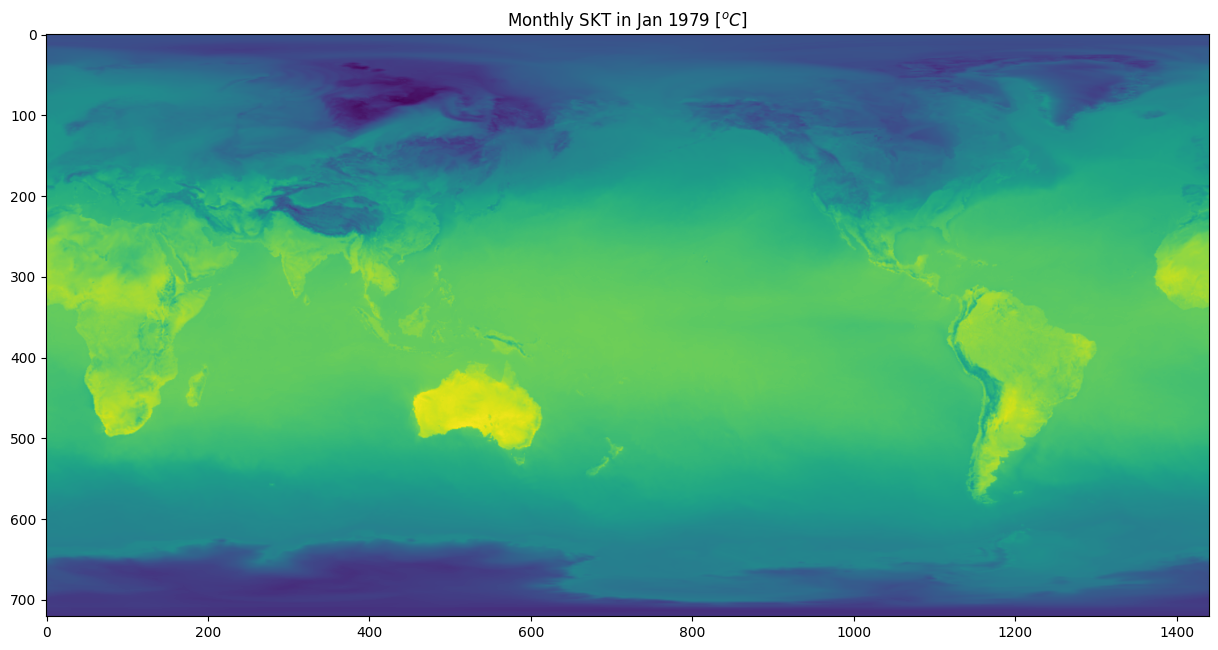

In [ ]:
plt.imshow(t2m[0])
plt.title('Monthly SKT in Jan 1979 [$^oC$]')

* the image provides a visual representation of global temperature variations in January 1979. By analyzing the color scale, land-sea patterns, and potential anomalies

In [ ]:
print(fh)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    CDI: Climate Data Interface version 2.0.4 (https://mpimet.mpg.de/cdi)
    Conventions: CF-1.6
    history: Thu Jan 04 10:59:49 2024: cdo monmax ERA5_t2m_3hrly_daymax_7922.nc ERA5_t2m_3hrly_monmax_7922.nc
Wed Jan 03 13:34:19 2024: cdo daymax ERA5_t2m_3hrly_7922.nc ERA5_t2m_3hrly_daymax_7922.nc
Sun Dec 31 01:55:22 2023: cdo -f nc -b F32 mergetime ERA5_t2m_3hrly_1979.nc ERA5_t2m_3hrly_1980.nc ERA5_t2m_3hrly_1981.nc ERA5_t2m_3hrly_1982.nc ERA5_t2m_3hrly_1983.nc ERA5_t2m_3hrly_1984.nc ERA5_t2m_3hrly_1985.nc ERA5_t2m_3hrly_1986.nc ERA5_t2m_3hrly_1987.nc ERA5_t2m_3hrly_1988.nc ERA5_t2m_3hrly_1989.nc ERA5_t2m_3hrly_1990.nc ERA5_t2m_3hrly_1991.nc ERA5_t2m_3hrly_1992.nc ERA5_t2m_3hrly_1993.nc ERA5_t2m_3hrly_1994.nc ERA5_t2m_3hrly_1995.nc ERA5_t2m_3hrly_1996.nc ERA5_t2m_3hrly_1997.nc ERA5_t2m_3hrly_1998.nc ERA5_t2m_3hrly_1999.nc ERA5_t2m_3hrly_2000.nc ERA5_t2m_3hrly_2001.nc ERA5_t2m_3hrly_200

## 3. Read Land Mask Data

### 3.1 Read Data

In [ ]:
#load and assign variable to land data
lmfile = '/content/drive/MyDrive/Project Learnings/Data/ERA5_t2m_3hrly_monmax_7922_over_land.nc'

In [ ]:
lmset  = Dataset(lmfile)

In [ ]:
print(lmset)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    CDI: Climate Data Interface version 2.0.4 (https://mpimet.mpg.de/cdi)
    Conventions: CF-1.6
    history: Thu Feb 01 11:54:05 2024: cdo -f nc ifthen topo_land_grid_A.nc ERA5_t2m_3hrly_monmax_7922.nc ERA5_t2m_3hrly_monmax_7922_over_land.nc
Thu Jan 04 10:59:49 2024: cdo monmax ERA5_t2m_3hrly_daymax_7922.nc ERA5_t2m_3hrly_monmax_7922.nc
Wed Jan 03 13:34:19 2024: cdo daymax ERA5_t2m_3hrly_7922.nc ERA5_t2m_3hrly_daymax_7922.nc
Sun Dec 31 01:55:22 2023: cdo -f nc -b F32 mergetime ERA5_t2m_3hrly_1979.nc ERA5_t2m_3hrly_1980.nc ERA5_t2m_3hrly_1981.nc ERA5_t2m_3hrly_1982.nc ERA5_t2m_3hrly_1983.nc ERA5_t2m_3hrly_1984.nc ERA5_t2m_3hrly_1985.nc ERA5_t2m_3hrly_1986.nc ERA5_t2m_3hrly_1987.nc ERA5_t2m_3hrly_1988.nc ERA5_t2m_3hrly_1989.nc ERA5_t2m_3hrly_1990.nc ERA5_t2m_3hrly_1991.nc ERA5_t2m_3hrly_1992.nc ERA5_t2m_3hrly_1993.nc ERA5_t2m_3hrly_1994.nc ERA5_t2m_3hrly_1995.nc ERA5_t2m_3hrly_1996.nc 

In [ ]:
lat = lmset.variables['latitude'][:]
lon = lmset.variables['longitude'][:]

### 3.2 Have a look

In [ ]:
#masking only t2m data of the jan 1979 only
lsmask = lmset['t2m'][0,:,:]

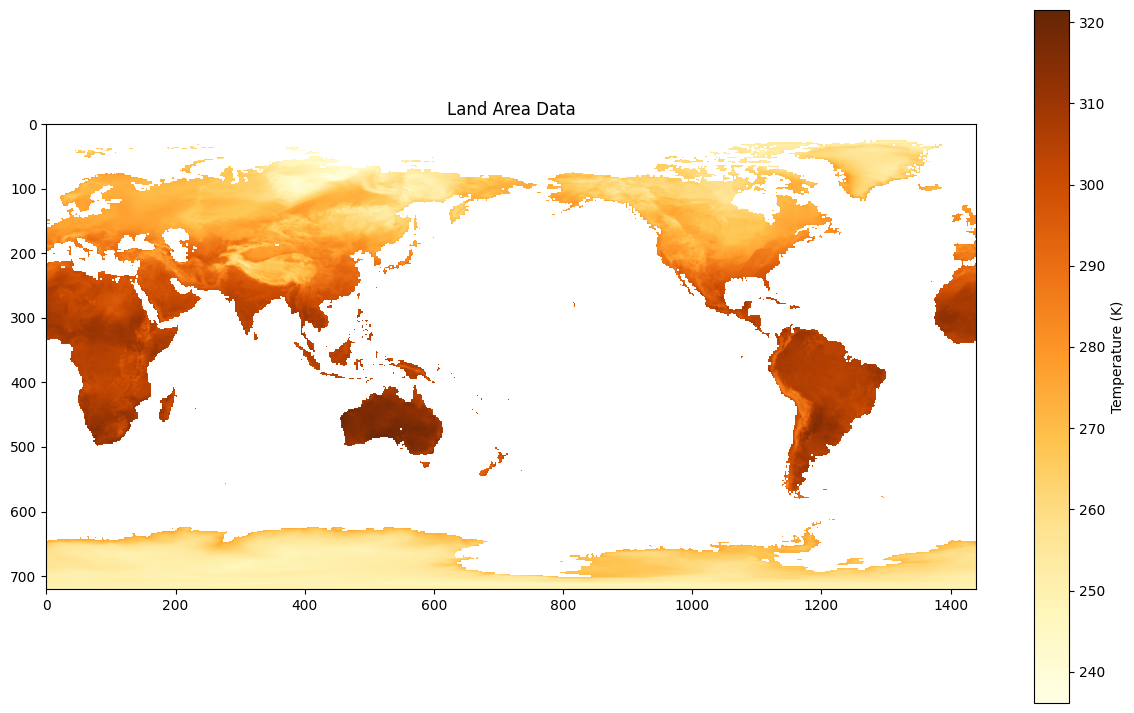

In [ ]:
plt.imshow(lsmask, cmap='YlOrBr')  # 'YlOrBr' for land-like colors
plt.title('Land Area Data')
plt.colorbar(label='Temperature (K)')
plt.show()

### 3.3 Set "1" on Ocean and "nan" on the land

In [ ]:
ocean_mask = np.where(lsmask > 0, np.nan, 1)

* The ocean_mask array will have the same dimensions as lsmask. Elements corresponding to land areas will be np.nan, while elements corresponding to ocean areas will be 1. This mask can be used to filter out land data or apply specific operations to ocean data in subsequent calculations.

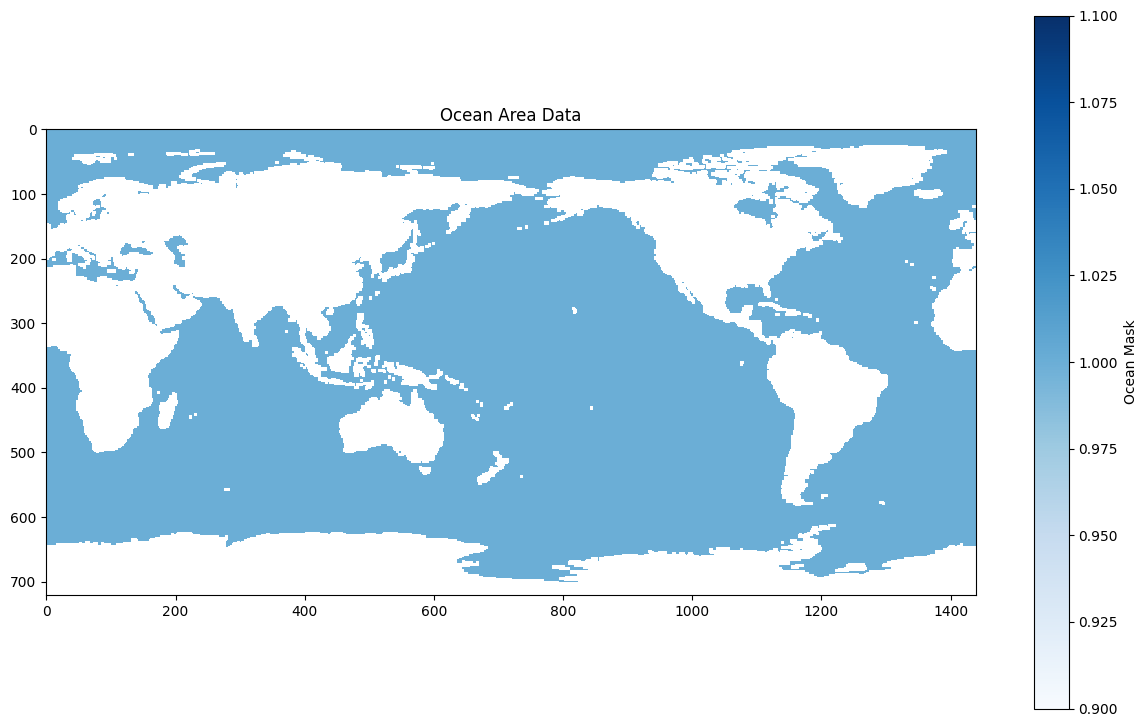

In [ ]:
# Plot the ocean data
plt.imshow(ocean_mask, cmap='Blues')  # 'Blues' for ocean colors
plt.title('Ocean Area Data')
plt.colorbar(label='Ocean Mask')
plt.show()

## 4. Calculate yearly climatology in the first year 1979

* Get t2m for the first year
* Calculate yearly mean
* Mask the yearly mean over ocean

In [ ]:
# Calculates the annual mean temperature for the year 1979.
# t2m_y1 will contain a 2D array representing the average temperature for each latitude and longitude point in 1979.
t2m_y1 = np.mean(t2m[0:12,:,:], axis=0)

In [ ]:
t2m_y1

masked_array(
  data=[[265.33563, 265.33563, 265.33563, ..., 265.33563, 265.33563,
         265.33563],
        [265.55838, 265.55923, 265.55957, ..., 265.55627, 265.55676,
         265.55774],
        [265.63882, 265.6393 , 265.64017, ..., 265.63232, 265.6348 ,
         265.63715],
        ...,
        [236.58089, 236.57542, 236.57173, ..., 236.59406, 236.59138,
         236.58708],
        [236.65117, 236.65001, 236.64915, ..., 236.65367, 236.65234,
         236.65184],
        [236.53612, 236.53612, 236.53612, ..., 236.53612, 236.53612,
         236.53612]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [ ]:
# masking the land, leave ocean alone
t2m_y1 = t2m_y1*ocean_mask

In [ ]:
t2m_y1

masked_array(
  data=[[265.33563232, 265.33563232, 265.33563232, ..., 265.33563232,
         265.33563232, 265.33563232],
        [265.55838013, 265.55923462, 265.55957031, ..., 265.55627441,
         265.5567627 , 265.55773926],
        [265.63882446, 265.63931274, 265.64016724, ..., 265.63232422,
         265.63479614, 265.637146  ],
        ...,
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],
  mask=False,
  fill_value=1e+20)

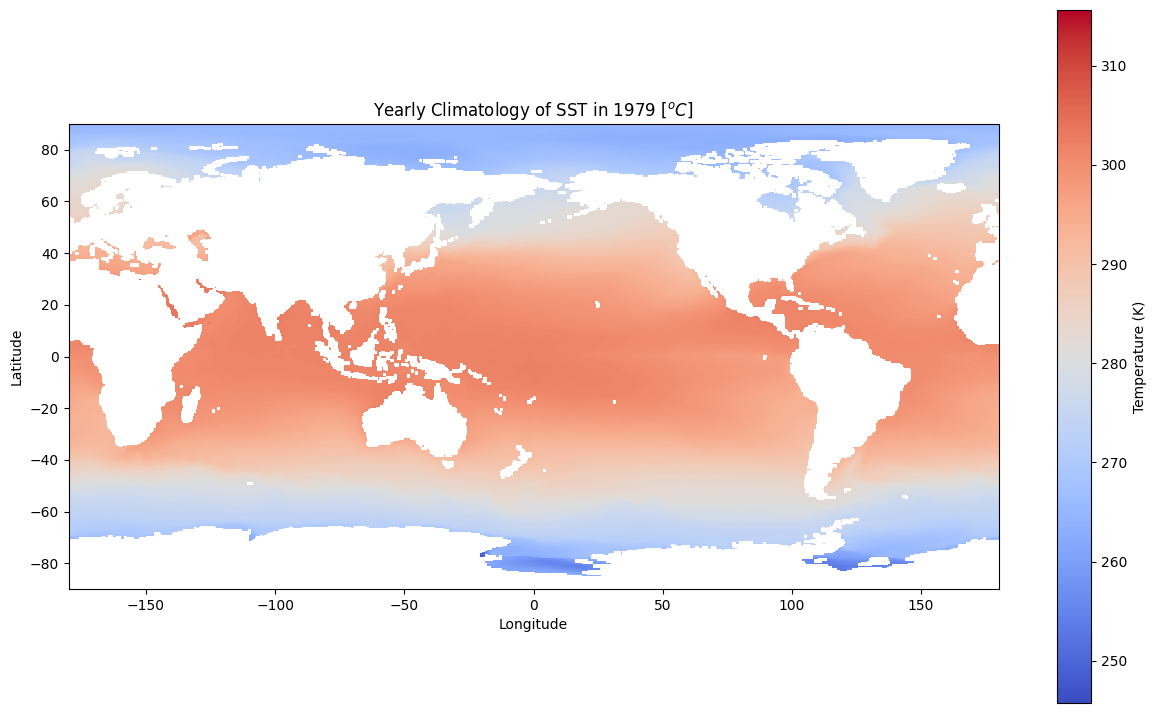

In [ ]:
plt.imshow(t2m_y1, cmap='coolwarm', extent=(-180, 180, -90, 90))
plt.title('Yearly Climatology of SST in 1979 [$^oC$]')
plt.colorbar(label='Temperature (K)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')  # Add labels for clarity
plt.show()

## 5. Simply calculate global mean

The following is the global averaged sst value. True only considering regular grid. **No weighting needed.**

In [ ]:
sst_global = np.nanmean(t2m_y1)
sst_global

286.72449222224066